In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [17]:
df = pd.read_csv("newly_truncated_value.csv")
df['7'] = df['7'].replace(0.99998999999999993,0)
df.head()

,0,1,2,3,4,5,6,7
0,0.0,0.5,1.053192e-29,9.554672e-30,0.0,1.00000,0.99993,1.0
1,0.0,0.5,9.554672e-30,2.179346e-30,1.0,0.99993,0.99997,1.0
2,0.0,0.5,5.146897e-30,9.554672e-30,0.0,0.99999,0.99993,1.0
3,0.0,0.5,5.466025e-30,9.554672e-30,0.0,0.99996,0.99993,1.0
4,0.0,0.5,2.055620e-30,9.554672e-30,0.0,0.99993,0.99993,0.0


In [18]:
df.shape

(2897, 8)

In [19]:
X = np.array(df.drop(['5','6','7'],1))
y = np.array(df['7'])
y = y.astype("int")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)



In [22]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
     #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

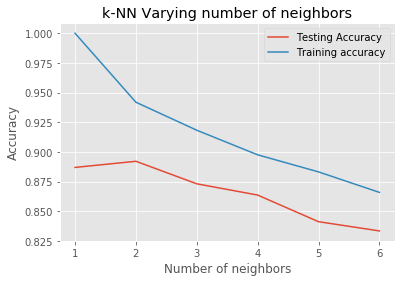

In [23]:


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [25]:


#Fit the model
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [27]:


#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)



0.8921484037963762

In [28]:


#import confusion_matrix
from sklearn.metrics import confusion_matrix



In [14]:


#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)



In [15]:
confusion_matrix(y_test,y_pred)

array([[2954,   37],
       [ 121,  438]])

In [16]:


pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



Predicted,0,1,All
True,,,
0,2954,37,2991
1,121,438,559
All,3075,475,3550


In [16]:


#import classification_report
from sklearn.metrics import classification_report



In [17]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2991
          1       0.92      0.78      0.85       559

avg / total       0.95      0.96      0.95      3550



In [31]:


y_pred_proba = knn.predict_proba(X_test)[:,1]



In [32]:
from sklearn.metrics import roc_curve

In [33]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



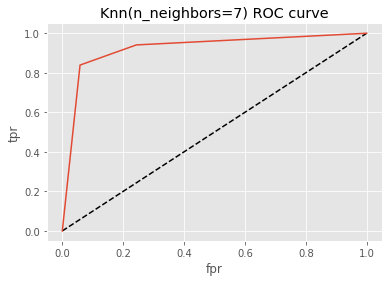

In [34]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [35]:


#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)



0.9234496124031006

In [36]:


#import GridSearchCV
from sklearn.model_selection import GridSearchCV



In [37]:


#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}



In [26]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)



GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:


knn_cv.best_score_



0.92944888989067964

In [77]:


knn_cv.best_params_



{'n_neighbors': 2}

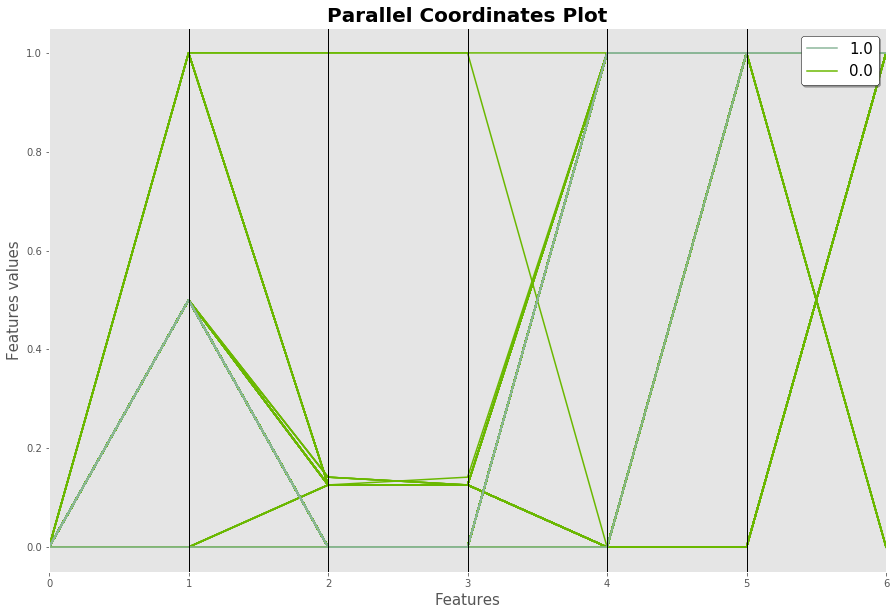

In [38]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(df,"7")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

LinAlgError: singular matrix

<Figure size 432x288 with 0 Axes>

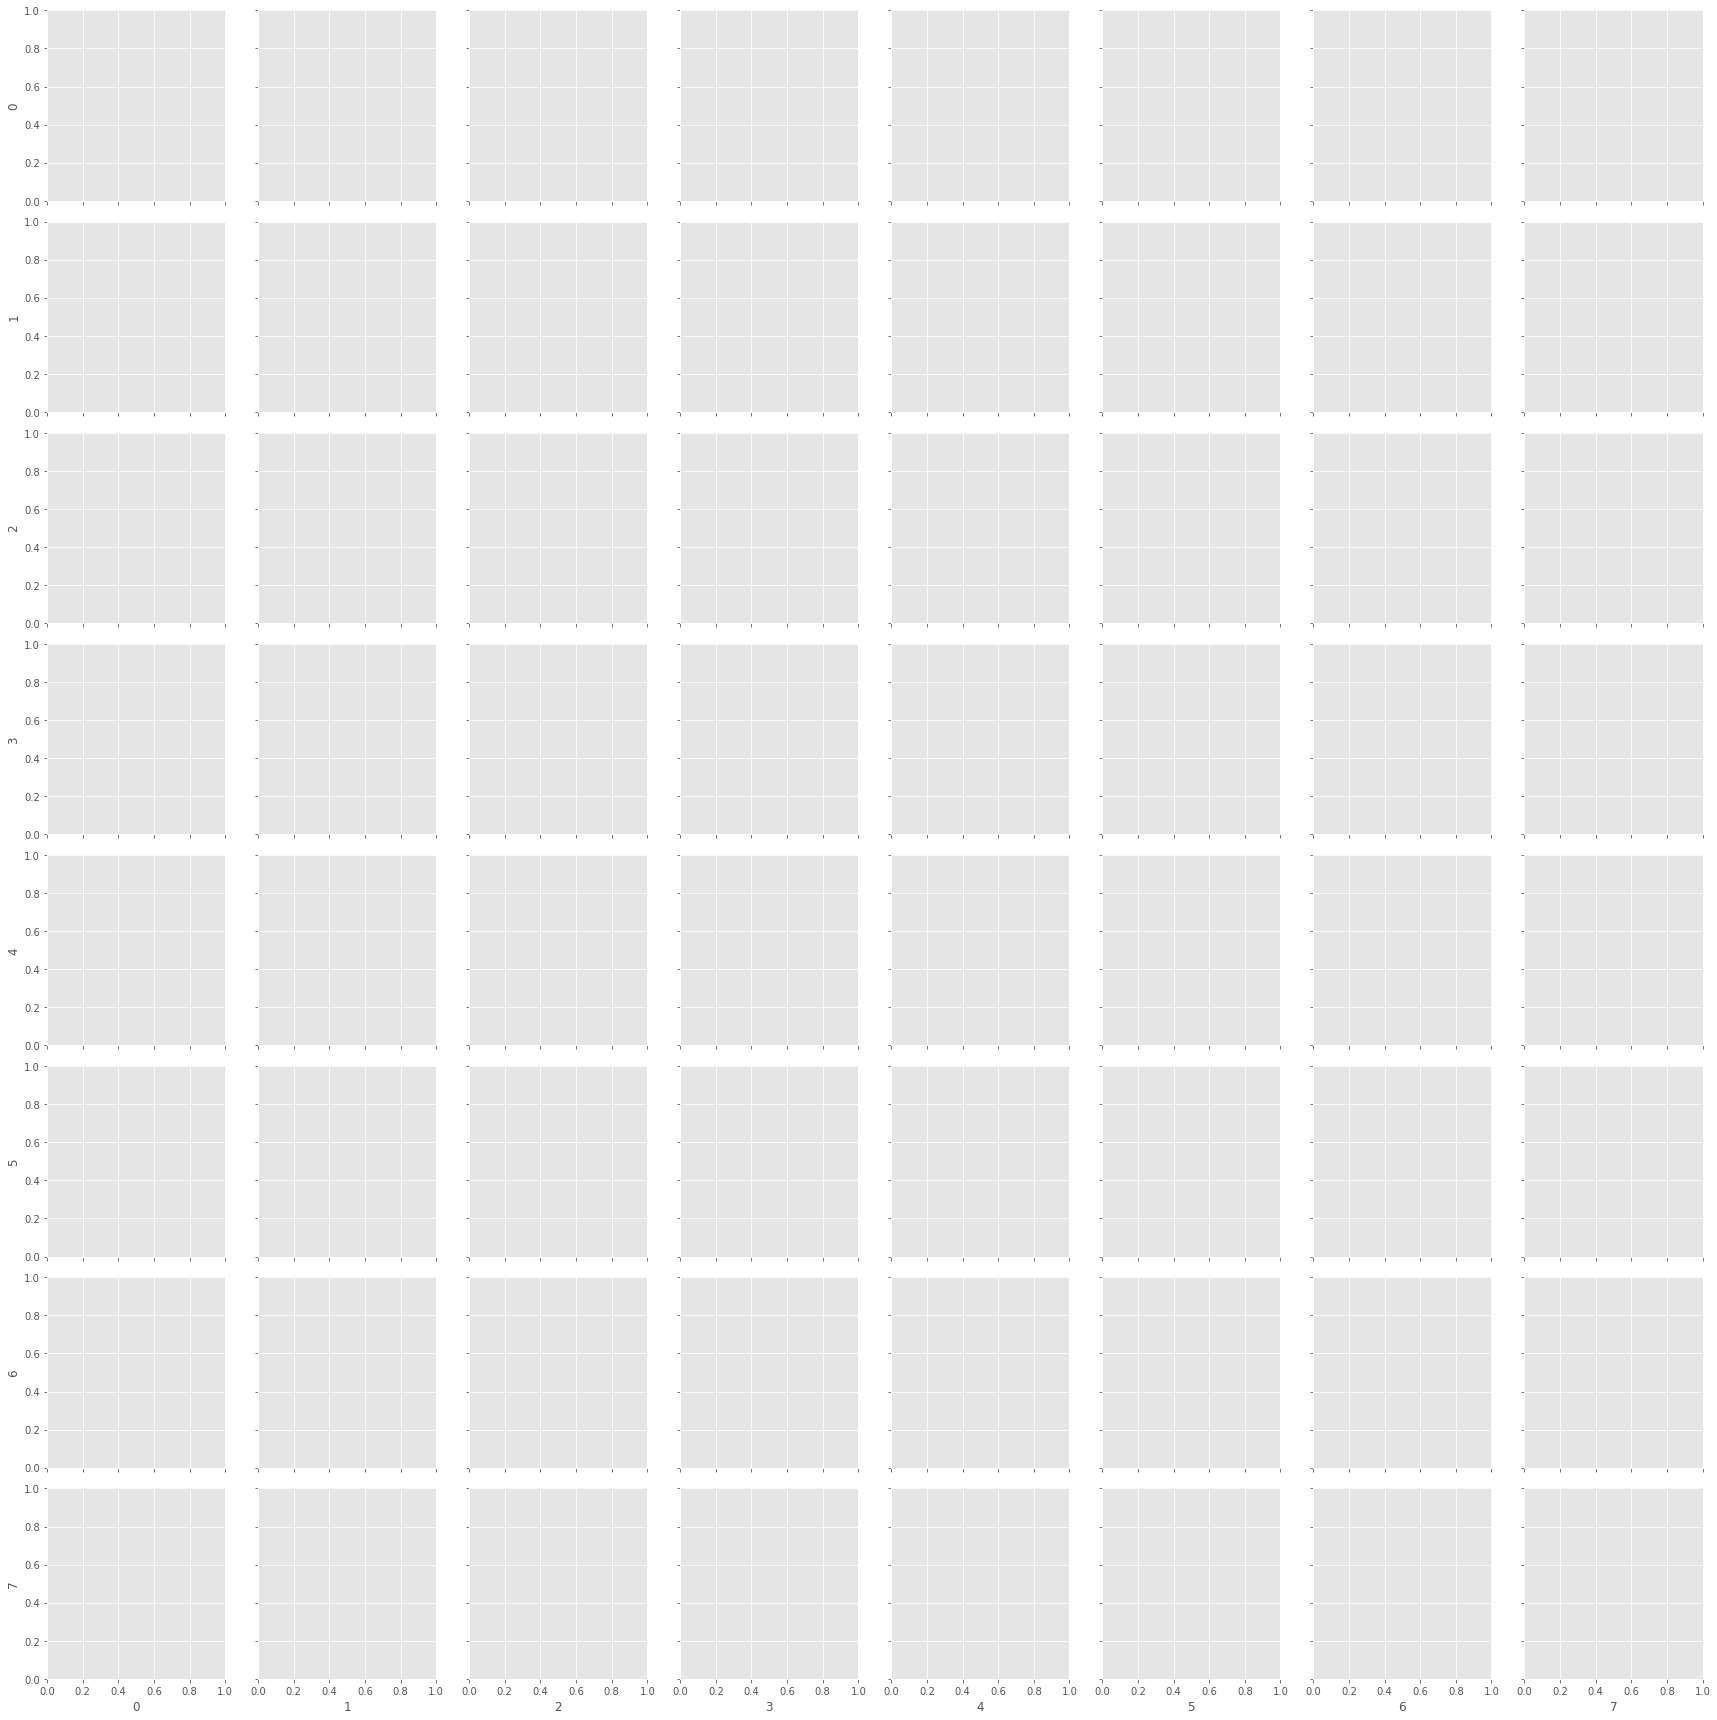

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure()
sns.pairplot(df, hue = "7", height=3, markers=["o", "s"])
plt.show()

